In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,5
sns.set_style("whitegrid")

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

c:\Users\hsingh\AppData\Local\anaconda3\anaconda\envs\strategic\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# NON-STATIONARY DATASET
df1=pd.read_csv('Data/airline_passengers.csv', parse_dates=True, index_col='Month')
df1.index.freq='MS'

# STATIONARY DATASET
df2=pd.read_csv('Data/DailyTotalFemaleBirths.csv', parse_dates=True, index_col='Date')
df2.index.freq='D'

In [3]:
df2.reset_index(inplace=True)

In [4]:
df2

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [5]:
df2.columns = ['ds','y']
df2['ds'] = pd.to_datetime(df2['ds'])

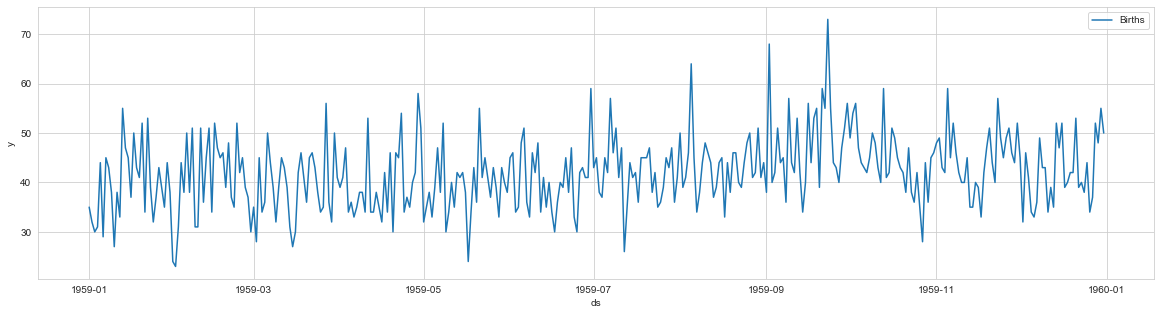

In [6]:
sns.lineplot(x='ds',y='y',data=df2,label='Births')

In [7]:
len(df2)

365

In [8]:
len(df2)-30

335

In [9]:
train = df2.iloc[:335]
test = df2.iloc[335:]

In [10]:
train

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
330,1959-11-27,51
331,1959-11-28,46
332,1959-11-29,44
333,1959-11-30,52


In [11]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=30,freq='D')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
forecast=m.predict(future)

In [13]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
ds    365 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [14]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 16 columns):
ds                            365 non-null datetime64[ns]
trend                         365 non-null float64
yhat_lower                    365 non-null float64
yhat_upper                    365 non-null float64
trend_lower                   365 non-null float64
trend_upper                   365 non-null float64
additive_terms                365 non-null float64
additive_terms_lower          365 non-null float64
additive_terms_upper          365 non-null float64
weekly                        365 non-null float64
weekly_lower                  365 non-null float64
weekly_upper                  365 non-null float64
multiplicative_terms          365 non-null float64
multiplicative_terms_lower    365 non-null float64
multiplicative_terms_upper    365 non-null float64
yhat                          365 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 45.8 KB


In [15]:
test.head()

,ds,y
335,1959-12-02,32
336,1959-12-03,46
337,1959-12-04,41
338,1959-12-05,34
339,1959-12-06,33


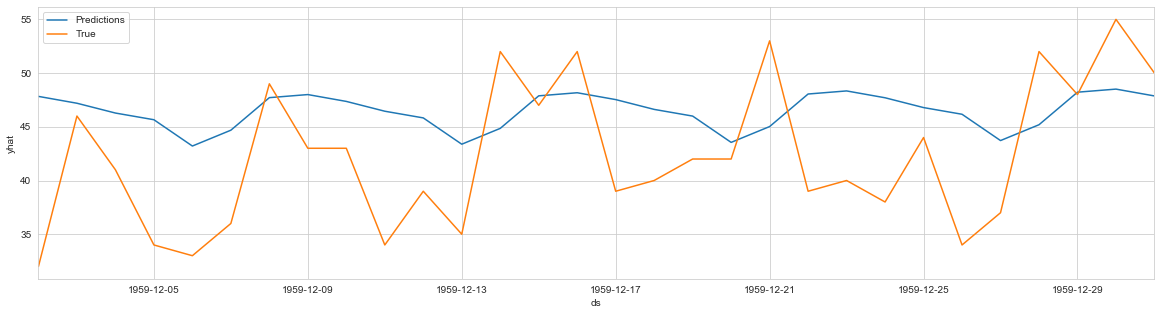

In [16]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:

df3=df2.copy()
df3.set_index('ds', inplace=True)

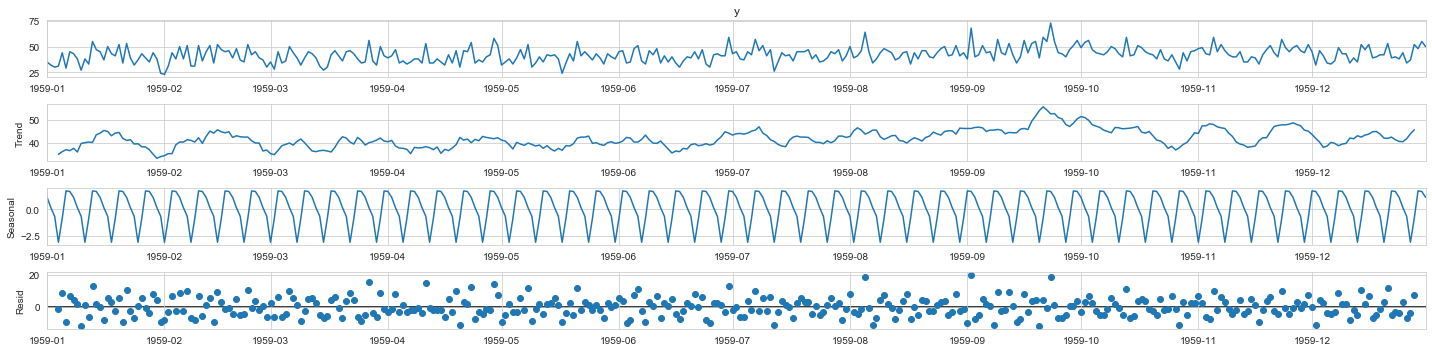

In [19]:
seasonal_decompose(df3['y']).plot();

In [20]:
m = Prophet(seasonality_mode='additive', 
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False)
m.fit(train)
future = m.make_future_dataframe(periods=30,freq='D')
forecast=m.predict(future)

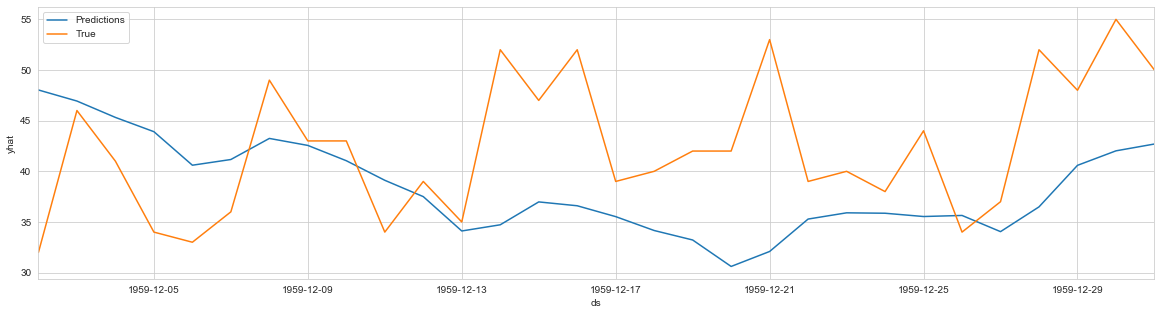

In [21]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [22]:
# Create the Prophet model with seasonality settings and additional regressors
m = Prophet(
    seasonality_mode='additive',
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    changepoint_prior_scale=0.05,  # Fine-tune changepoint prior scale
    seasonality_prior_scale=10   
)

# Add custom seasonality components if needed
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='weekly', period=7, fourier_order=3)  

# Fit the model to the training data
m.fit(train)

# Create future dataframe for forecasting
future = m.make_future_dataframe(periods=30, freq='D')

# Generate the forecast
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


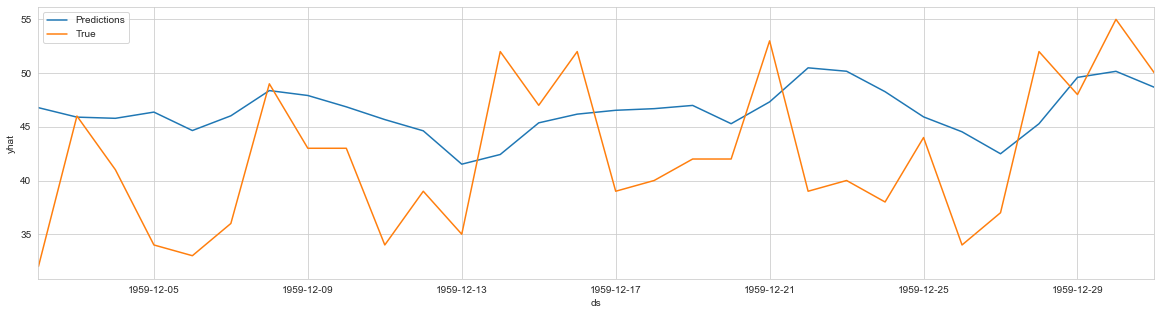

In [23]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

# Hyperparameter Tuning

In [24]:
from sklearn.model_selection import ParameterGrid

def evaluate(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100
    
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0]
}

grid = list(ParameterGrid(param_grid))

best_score = float('inf')
best_params = {}

for params in grid:

    m = Prophet(**params)
    m.fit(train)
    forecast = m.predict(future)
    score = evaluate(df2['y'], forecast['yhat'])
    if score < best_score:
        best_score = score
        best_params = params
        
print("Best hyperparameters:", best_params)

Best hyperparameters: {'changepoint_prior_scale': 1.0, 'daily_seasonality': False, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1, 'weekly_seasonality': True, 'yearly_seasonality': True}


In [25]:
# Create the Prophet model with seasonality settings and additional regressors
m = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=1.0,  
    seasonality_prior_scale=0.1   
)

# Add custom seasonality components if needed
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='weekly', period=7, fourier_order=3)  

# Fit the model to the training data
m.fit(train)

# Create future dataframe for forecasting
future = m.make_future_dataframe(periods=30, freq='D')

# Generate the forecast
forecast = m.predict(future)

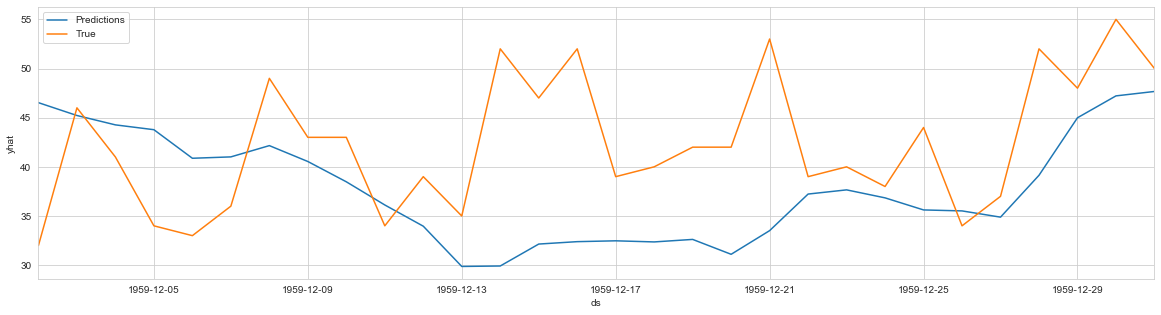

In [26]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

# Airline Passenger Data

In [27]:
df=pd.read_csv('Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                      144 non-null object
Thousands of Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [29]:
df['Month']=pd.DatetimeIndex(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                      144 non-null datetime64[ns]
Thousands of Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [30]:
df.columns=['ds','y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0.5, 0, 'Date')

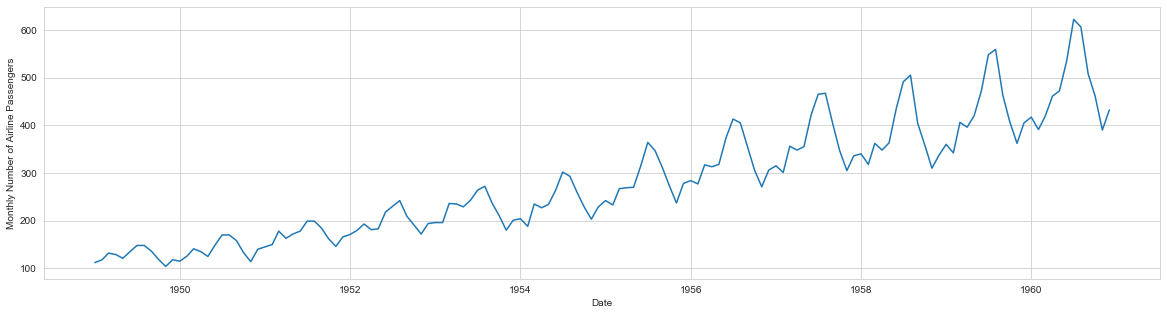

In [31]:
ax=sns.lineplot(data=df, x="ds", y="y")
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

In [32]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [33]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [35]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.378677,41.928157,128.646010
1,1949-02-01,77.786826,35.369000,121.797295
2,1949-03-01,109.994541,67.056468,155.533079
3,1949-04-01,107.446903,66.508932,149.738733
4,1949-05-01,110.934953,65.339112,155.245360


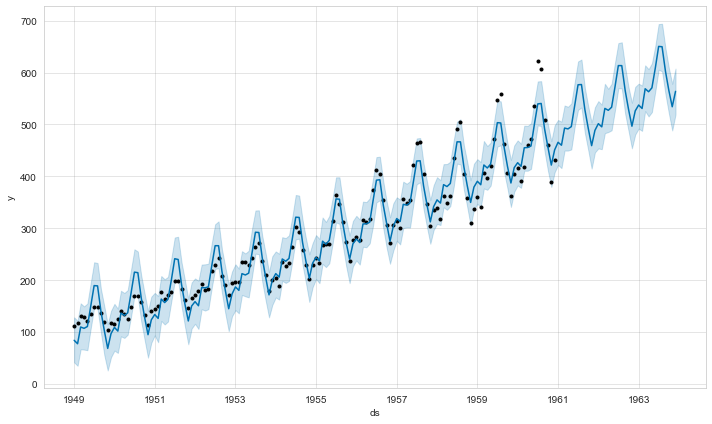

In [36]:
my_model.plot(forecast, uncertainty=True);

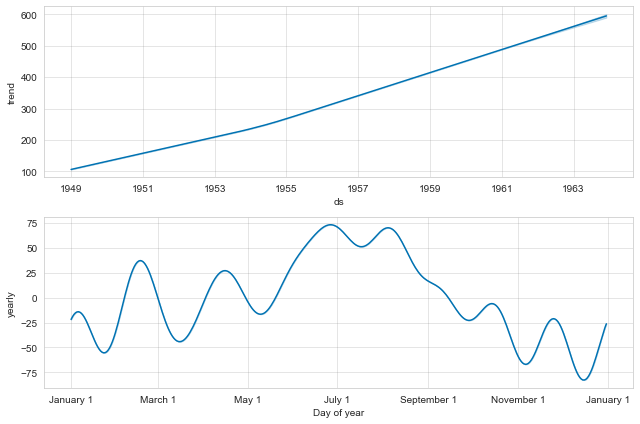

In [37]:
my_model.plot_components(forecast);

# Groceries Sales Data

In [38]:
df=pd.read_csv('Data/Groceries_Sales_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
Date     756 non-null object
Sales    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 11.9+ KB


In [39]:
df.head()

,Date,Sales
0,2018/02/01,21199.0
1,2018/02/02,10634.0
2,2018/02/03,7966.0
3,2018/02/04,1353.0
4,2018/02/05,9497.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


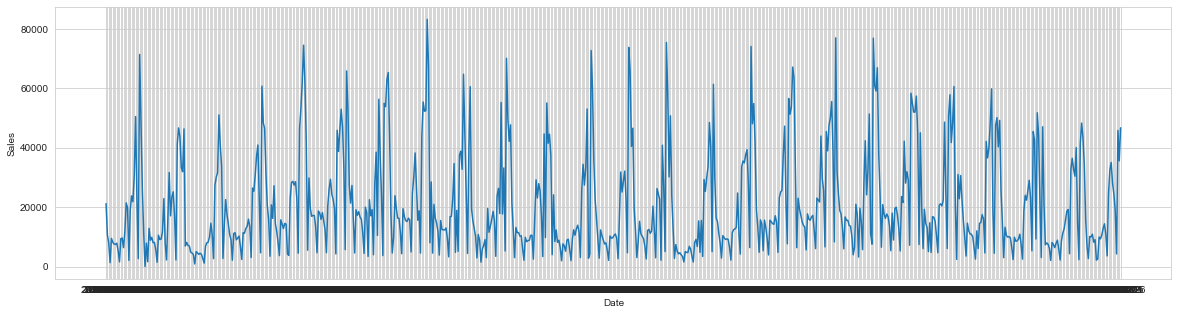

In [40]:
sns.lineplot(data=df, x="Date", y="Sales");

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
Date     756 non-null object
Sales    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 11.9+ KB


In [46]:
def date_features(df, label=None):
    df = df.copy()

    df['date'] = pd.to_datetime(df.Date)  # Converts the 'Date' column to datetime format.
    
    df['month'] = df['date'].dt.strftime('%B')
    df['year'] = df['date'].dt.strftime('%Y')
    df['dayofweek'] = df['date'].dt.strftime('%A')
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear  # Note: 'weekofyear' is deprecated, use 'isocalendar().week' instead.
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = date_features(df, label='Sales')
df_new = pd.concat([X, y], axis=1)
df_new.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Sales
0,Thursday,1,February,2018,32,1,5,21199.0
1,Friday,1,February,2018,33,2,5,10634.0
2,Saturday,1,February,2018,34,3,5,7966.0
3,Sunday,1,February,2018,35,4,5,1353.0
4,Monday,1,February,2018,36,5,6,9497.0


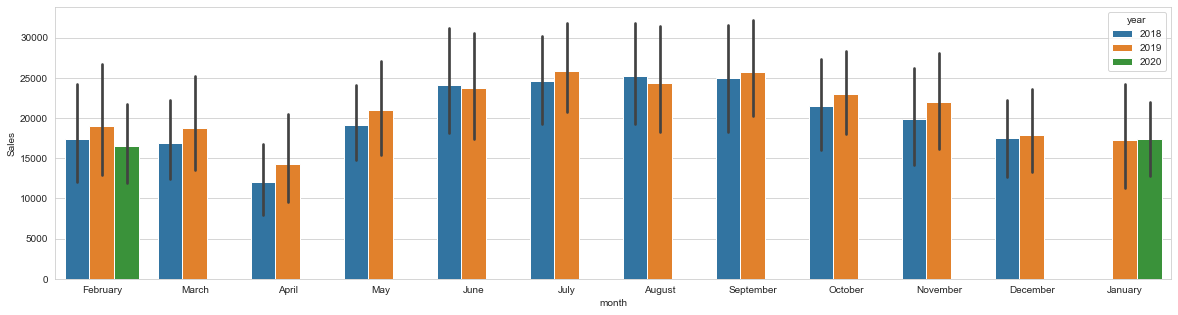

In [49]:
sns.barplot(x='month', y='Sales', hue='year', data=df_new);

In [50]:
df.columns=['ds','y']
df.head()

,ds,y
0,2018/02/01,21199.0
1,2018/02/02,10634.0
2,2018/02/03,7966.0
3,2018/02/04,1353.0
4,2018/02/05,9497.0


In [51]:
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2018-02-01,21199.0
1,2018-02-02,10634.0
2,2018-02-03,7966.0
3,2018-02-04,1353.0
4,2018-02-05,9497.0


In [81]:
end_date = '2019-12-31'
mask1 = (df['ds'] <= end_date)
mask2 = (df['ds'] > end_date)

In [82]:
train=df.loc[mask1]
test=df.loc[mask2]

In [83]:
test

,ds,y
699,2020-01-01,7353.6
700,2020-01-02,7959.7
701,2020-01-03,7559.3
702,2020-01-04,6162.3
703,2020-01-05,2085.9
704,2020-01-06,8120.0
705,2020-01-07,7464.4
706,2020-01-08,6385.6
707,2020-01-09,7873.0
708,2020-01-10,8899.9


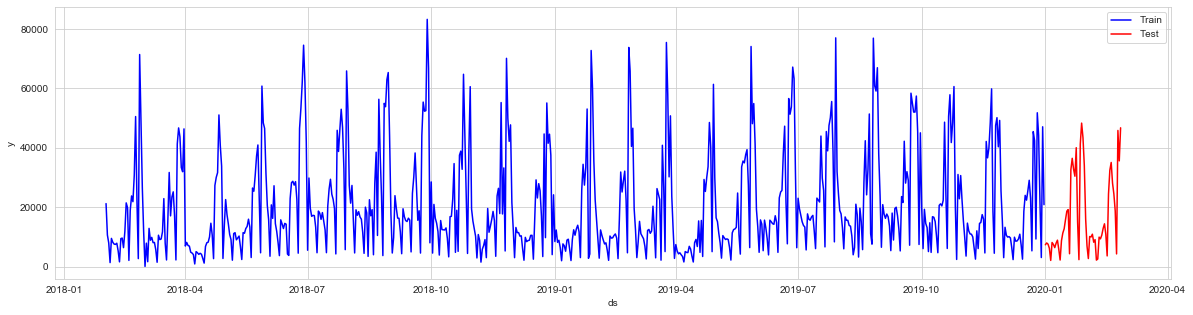

In [58]:
sns.lineplot(x='ds', y='y', data= train, color='blue', label='Train')
sns.lineplot(x='ds', y='y', data= test, color='red', label='Test')

# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import ParameterGrid

params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
               'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
               'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0

for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [65]:
import holidays

holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2018,2019,2020]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [66]:
holiday

,ds,holiday
0,2018-01-01,US-Holidays
1,2018-01-15,US-Holidays
2,2018-02-19,US-Holidays
3,2018-05-28,US-Holidays
4,2018-07-04,US-Holidays
5,2018-09-03,US-Holidays
6,2018-10-08,US-Holidays
7,2018-11-11,US-Holidays
8,2018-11-12,US-Holidays
9,2018-11-22,US-Holidays


In [67]:
import random

strt='2019-12-31'
end='2020-02-26'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])

for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(train)
    train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    MAPE = evaluate(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 104.93842003640592
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 104.76394981993089
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 104.90772720936074
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 104.44032627681221
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Erro

In [68]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,100.534817,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,101.598804,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,101.933423,"{'changepoint_prior_scale': 0.3, 'holidays_pri..."
3,102.076690,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
4,102.105420,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."


In [69]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.1,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 150,
 'seasonality_mode': 'multiplicative'}

In [84]:
# Setup and train model with holidays
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.4,
                      n_changepoints = 150,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='US')
final_model.fit(train)

In [85]:
future = final_model.make_future_dataframe(periods=122, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
814,2020-04-25,11442.218087,-15484.586749,36708.238229
815,2020-04-26,-1562.091479,-31105.578958,25648.139827
816,2020-04-27,25026.958488,-856.657173,53355.512382
817,2020-04-28,22453.283885,-4183.625462,49790.221416
818,2020-04-29,20244.159274,-6481.722387,46159.745301
819,2020-04-30,22756.671953,-3702.613819,50494.620210
820,2020-05-01,22105.168184,-4211.546162,50458.142591


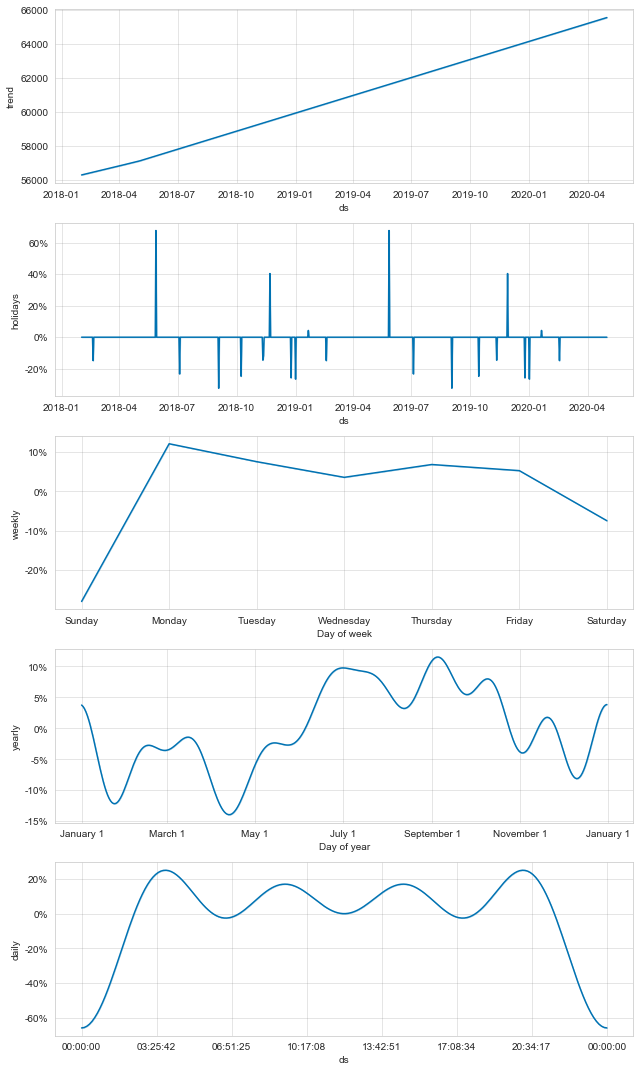

In [86]:
# Plot the components of the model
fig = final_model.plot_components(forecast)

In [87]:
test_final= final_model.predict(test)
test_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,24793.056724,-5601.350918,53375.797275
51,2020-02-21,23729.721920,-3515.316976,53053.064177
52,2020-02-22,15442.560785,-11503.378389,43924.705110
53,2020-02-23,2114.113459,-25745.407635,28728.038169
54,2020-02-24,27939.447116,2117.327869,54802.852098
55,2020-02-25,24937.908372,-3186.716819,51714.636910
56,2020-02-26,22316.671644,-5112.704475,49362.791747


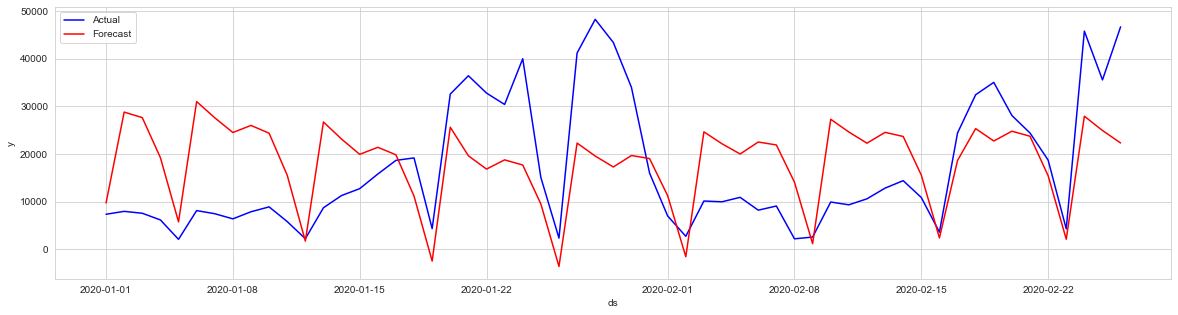

In [89]:
sns.lineplot(x='ds', y='y', data= test, color='blue', label='Actual')
sns.lineplot(x='ds', y='yhat', data= test_final, color='red', label='Forecast')